# Loan Eligibility Prediction

## Problem Statement:
Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customer-first applies for a home loan after that company validates the customer eligibility for a loan.

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer's segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("Loan Eligible Dataset\loan-train.csv")

In [3]:
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
325,LP002067,Male,Yes,1,Graduate,Yes,8666,4983.0,376.0,360.0,0.0,Rural,N
377,LP002223,Male,Yes,0,Graduate,No,4310,0.0,130.0,360.0,NaN,Semiurban,Y
31,LP001095,Male,No,0,Graduate,No,3167,0.0,74.0,360.0,1.0,Urban,N
311,LP002004,Male,No,0,Not Graduate,No,2927,2405.0,111.0,360.0,1.0,Semiurban,Y
406,LP002308,Male,Yes,0,Not Graduate,No,2167,2400.0,115.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.isna().sum() 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [10]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
# Normalize can be set to True to print proportions instead of number 
df['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

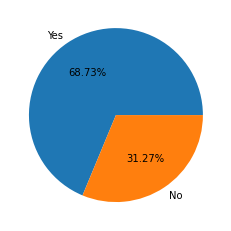

In [12]:
plt.pie(df['Loan_Status'].value_counts(), labels = ['Yes', 'No'], autopct = '%1.2f%%');

The loan of 422(around 69%) people out of 614 were approved.

In [13]:
print(pd.crosstab(df['Credit_History'], df['Loan_Status'], margins=True))

Loan_Status       N    Y  All
Credit_History               
0.0              82    7   89
1.0              97  378  475
All             179  385  564


As credit history has 50 missing value the count may not match with no. of row in data set.

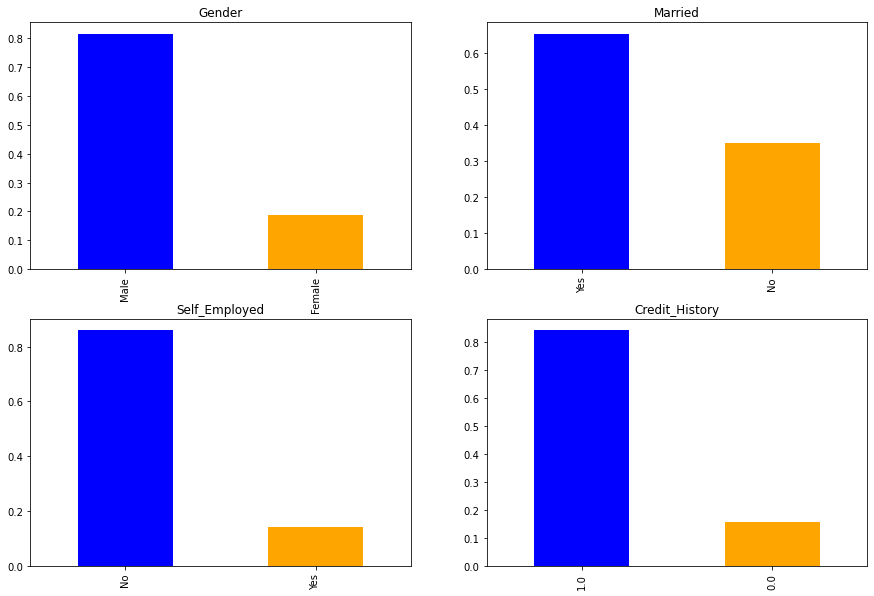

In [14]:
plt.figure(1)
plt.subplot(221)
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(15,10), title= 'Gender',color=['blue', 'orange'])

plt.subplot(222)
df['Married'].value_counts(normalize=True).plot.bar(title= 'Married', color=['blue', 'orange'])

plt.subplot(223)
df['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed', color=['blue', 'orange'])

plt.subplot(224)
df['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History', color=['blue', 'orange'])

plt.show()

### It can be inferred from the above bar plots that:

    80% of applicants in the dataset are male.
    Around 65% of the applicants in the dataset are married.
    Around 15% of applicants in the dataset are self-employed.
    Around 85% of applicants have repaid their debts.

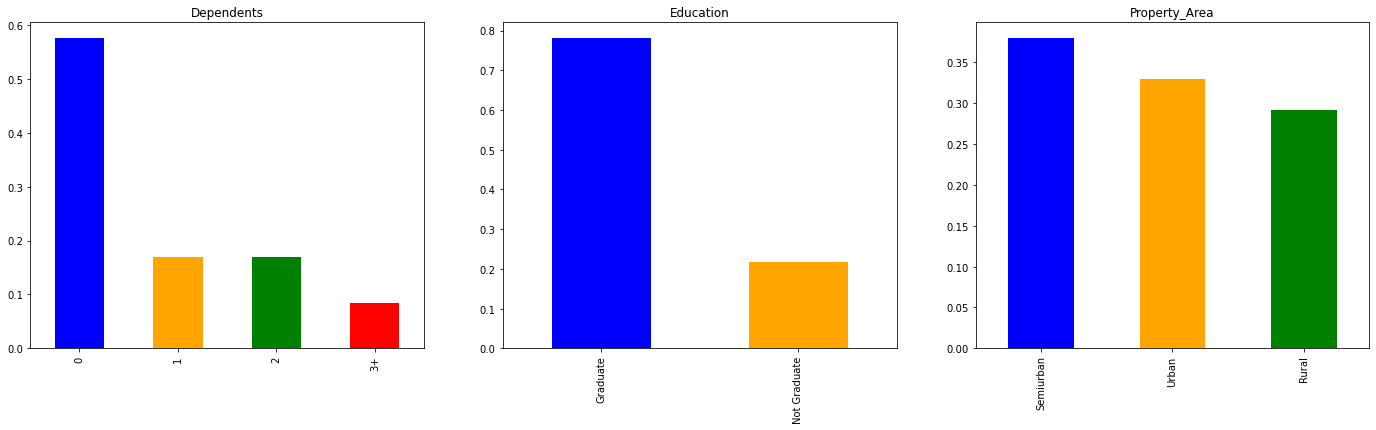

In [15]:
plt.figure(1)
plt.subplot(131)
df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents', color=['blue', 'orange','green','red'])

plt.subplot(132)
df['Education'].value_counts(normalize=True).plot.bar(title= 'Education', color=['blue', 'orange'])

plt.subplot(133)
df['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area', color=['blue', 'orange','green'])

plt.show()


### The inferences is made from the above bar plots:

    Most of the applicants don't have any dependents.
    Around 80% of the applicants are Graduate.
    Most of the applicants are from the Semiurban area.

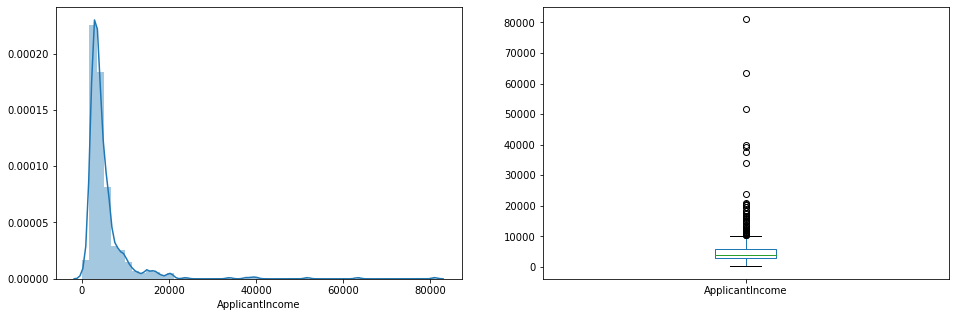

In [16]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['ApplicantIncome']);

plt.subplot(122)
df['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

### Distribution Plot:
Most of the data in the distribution of applicant income are towards the left (not normally distributed) We should make it normal as algorithms work better if the data is normally distributed. 

### Box Plot:
The boxplot confirms the presence of a lot of outliers/extreme values. This can be due to the income disparity in the society. It also shows us that we are looking at people with different education levels. Let us segregate them by Education.

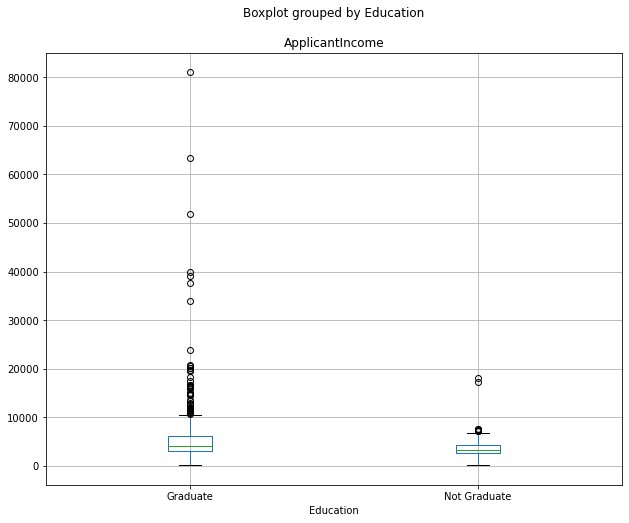

In [17]:
df.boxplot(column='ApplicantIncome', by='Education',figsize=(10,8))

We can see that there are a higher number of graduates with very high incomes, which are appearing to be outliers

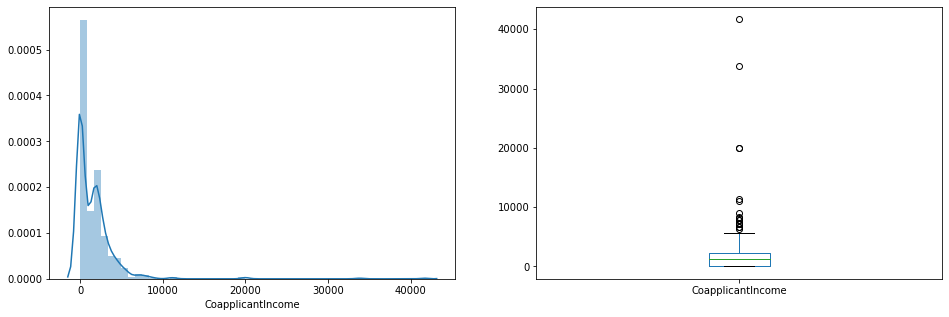

In [18]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['CoapplicantIncome']);

plt.subplot(122)
df['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

There is a similar distribution as that of the applicant's income. The majority of co-applicants income ranges from 0 to 5000. We also see a lot of outliers in the applicant's income and it is not normally distributed.

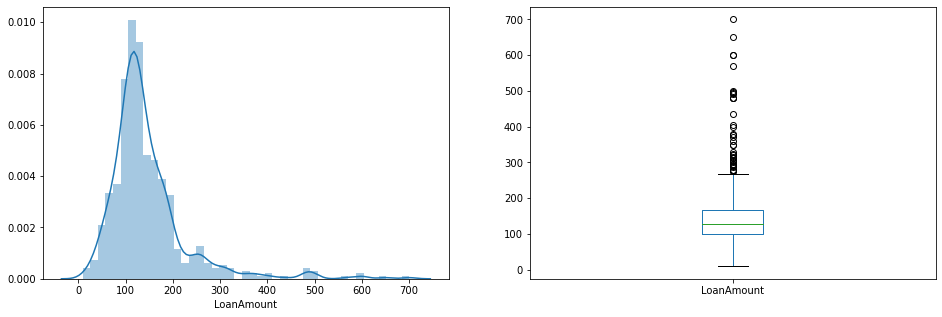

In [19]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['LoanAmount']);

plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

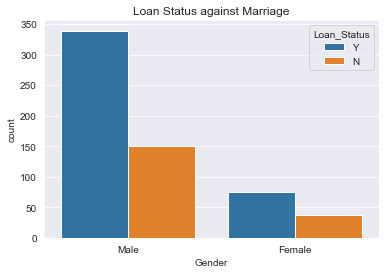

In [20]:
plt.figure(figsize =(6,4))
sns.set_style('darkgrid')
sns.countplot(x = 'Gender', hue = 'Loan_Status', data = df)
plt.title('Loan Status against Marriage');

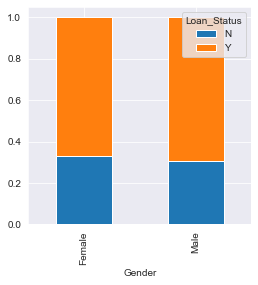

In [21]:
Gender=pd.crosstab(df['Gender'],df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

The proportion of male and female applicants is more or less the same for both approved and unapproved loans

In [22]:
pd.DataFrame(df.groupby(['Gender','Loan_Status'])['Loan_Status'].count())

Loan_Status
Gender Loan_Status             
Female N                     37
       Y                     75
Male   N                    150
       Y                    339

The proportion of married applicants is higher for approved loans.

Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status

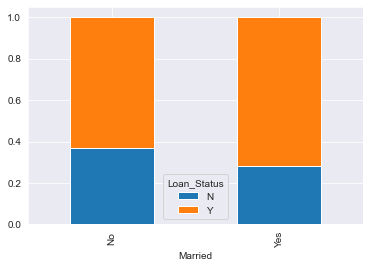

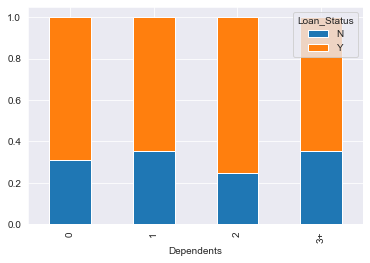

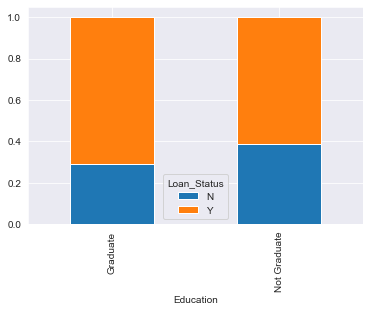

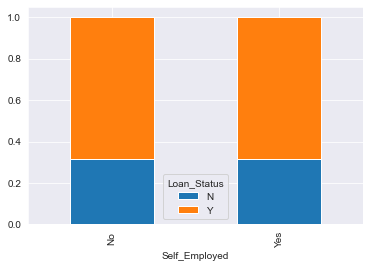

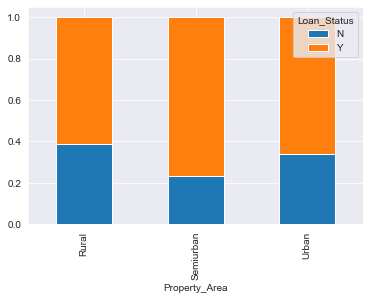

In [25]:
Married=pd.crosstab(df['Married'],df['Loan_Status'])
Dependents=pd.crosstab(df['Dependents'],df['Loan_Status'])
Education=pd.crosstab(df['Education'],df['Loan_Status'])
Self_Employed=pd.crosstab(df['Self_Employed'],df['Loan_Status'])
Property_Area=pd.crosstab(df['Property_Area'],df['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.show()



- Married : The proportion of married applicants is higher for approved loans.
- Dependents : Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status
- Education : The proportion of graduate applicants is higher for approved loans.
- Self Employed : There is nothing significant we can infer from Self_Employed vs Loan_Status plot
- Property Area : The proportion of loans getting approved in the semi-urban area is higher as compared to that in rural or urban areas

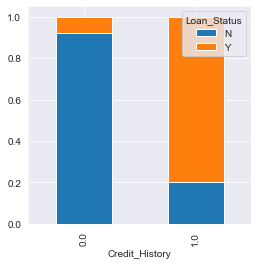

In [26]:
Credit_History=pd.crosstab(df['Credit_History'],df['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

- People with a credit history as 1 (cleared their previous debts) are more likely to get their loans approved.

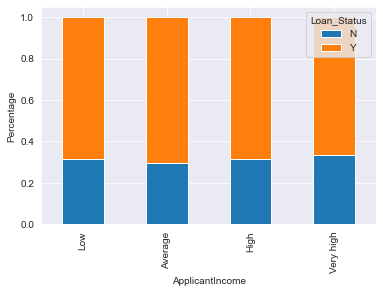

In [27]:
# Analyzing 'Applicant income' with 'loan status', Since its continous variable we have segreated data in a range for bar plot.
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
Incomes=pd.cut(df['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(Incomes,df['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')

- It can be inferred that Applicant's income does not affect the chances of loan approval

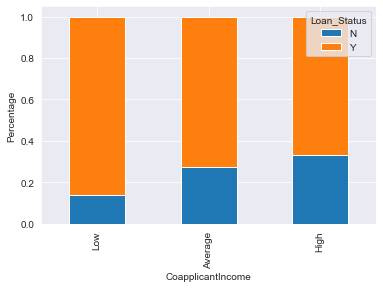

In [28]:
#Similarly analyzing 'co-applicant income' with 'loan status'
bins=[0,1000,3000,42000]''
group=['Low','Average','High']
Coapp_Income_Bin=pd.cut(df['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(Coapp_Income_Bin,df['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('CoapplicantIncome')
P=plt.ylabel('Percentage')

It shows that if co-applicants income is less the chances of loan approval are high.
But this does not look right. The possible reason behind this may be that most of the applicants don’t have any co-applicant so the co-applicant income for such applicants is 0 and hence the loan approval is not dependent on it.

Hence we can make a new variable in which we will combine the applicant’s and co-applicants income to visualize the combined effect of income on loan approval.
Let us combine the Applicant Income and Co-applicant Income and see the combined effect of Total Income on the Loan_Status.

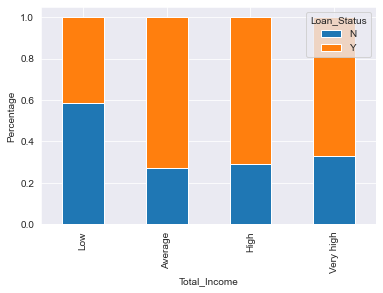

In [29]:
Total_Income=df['ApplicantIncome']+df['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
Total_Income_bin=pd.cut(Total_Income,bins,labels=group)
Total_Income_bin=pd.crosstab(Total_Income_bin,df['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')

- We can see that Proportion of loans getting approved for applicants having low Total_Income is very less compared to that of applicants with Average, High & Very High Income.

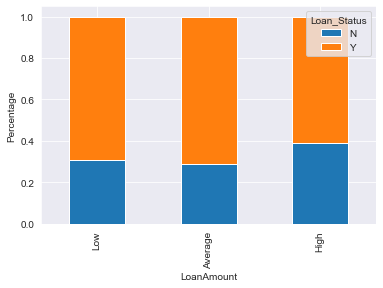

In [30]:
#Visualizing the Loan Amount variable
bins=[0,100,200,700]
group=['Low','Average','High']
Loan_Amount=pd.cut(df['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(Loan_Amount,df['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('LoanAmount')
P=plt.ylabel('Percentage')

- It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount. Thus the chances of loan approval will be high when the loan amount is less.

### Checking skewness of continous data

- we need to apply log transformations in order to bring the graph into a symmetric bell curve graph.
- We need to apply log transformations on ApplicantIncome,CoapplicantIncome, and LoanAmount.

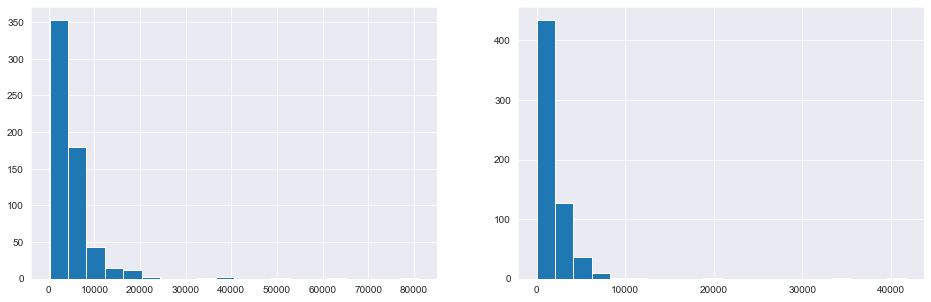

In [88]:
plt.figure(1)
plt.subplot(121)
df['ApplicantIncome'].hist(bins=20,figsize=(16,5))

plt.subplot(122)
df['CoapplicantIncome'].hist(bins=20)

plt.show()

Both ApplicantIncome & CoapplicantIncome Histogram is right skewed. Must be normalised.

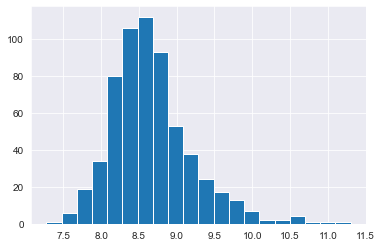

In [36]:
# Based on our above observation we are creating new feature 'Total Income' by combining ApplicantIncome and Co-applicantIncome.
#Finding total income by summing applicant and co-applicant income, Finding log of total income
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

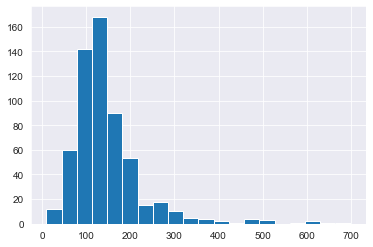

In [34]:
df['LoanAmount'].hist(bins=20)

LoanAmount distrubution is right skewed. So Data Must be normalised.

Normalising Loan Amount:

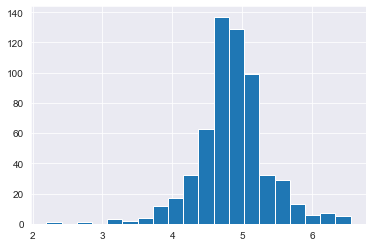

In [35]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

Data looks normalised

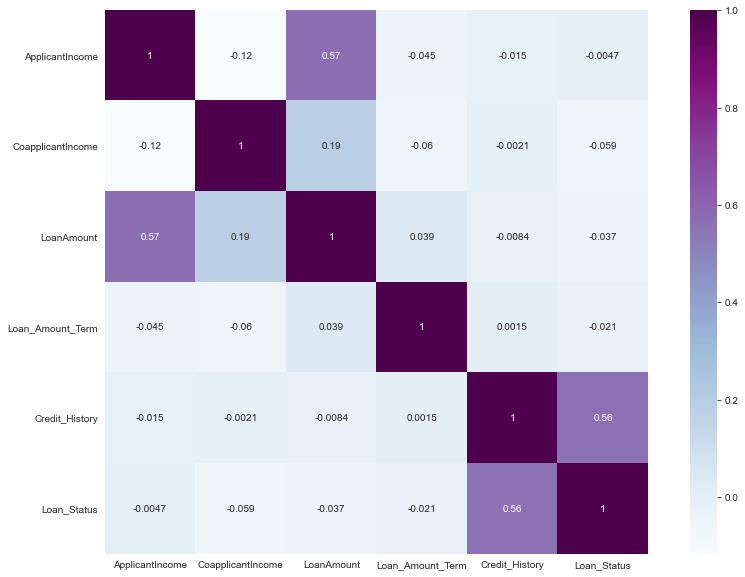

In [31]:
# Heat map to visualize the correlation
# Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.
df["Loan_Status"].replace('N', 0,inplace=True)
df["Loan_Status"].replace('Y', 1,inplace=True)
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),vmax=1,square=True,cmap="BuPu", annot = True,)

### The most correlated variables are

- ApplicantIncome - LoanAmount
- Credit_History - Loan_Status
- LoanAmount - CoapplicantIncome

In [37]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,NaN,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760,6000.0,8.699515
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1,5.587249,9613.0,9.170872
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1,4.553877,3849.0,8.255569
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,0,5.062595,5540.0,8.619750
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,1,5.123964,5532.0,8.618305
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,0,5.855072,23809.0,10.077819


### Handling Missing Values

In [38]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
TotalIncome           0
TotalIncome_log       0
dtype: int64

### Replacing missing values with mode value from the dataset for all categorical data

In [39]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

### Replacing missing values with mean for all numerical data

In [40]:
#df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.LoanAmount_log = df.LoanAmount_log.fillna(df.LoanAmount_log.mean())

In [41]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [42]:
df.keys()

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'TotalIncome', 'TotalIncome_log'],
      dtype='object')

In [43]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

### Label encoding categorical values for train data.

In [44]:
from sklearn.preprocessing import LabelEncoder
cat_cols=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
le=LabelEncoder()
for i in cat_cols:
    df[i]=le.fit_transform(df[i])
df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [45]:
df.shape

(614, 16)

In [46]:
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
191,LP001656,1,0,0,0,0,12000,0.0,164.0,360.0,1.0,1,0,5.099866,12000.0,9.392662
249,LP001825,1,1,0,0,0,1809,1868.0,90.0,360.0,1.0,2,1,4.499810,3677.0,8.209852
591,LP002931,1,1,2,0,1,6000,0.0,205.0,240.0,1.0,1,0,5.323010,6000.0,8.699515
195,LP001665,1,1,1,0,0,3125,2583.0,170.0,360.0,1.0,1,0,5.135798,5708.0,8.649624
161,LP001562,1,1,0,0,0,7933,0.0,275.0,360.0,1.0,2,0,5.616771,7933.0,8.978787
404,LP002301,0,0,0,0,1,7441,0.0,194.0,360.0,1.0,0,0,5.267858,7441.0,8.914761
386,LP002239,1,0,0,1,0,2346,1600.0,132.0,360.0,1.0,1,1,4.882802,3946.0,8.280458
71,LP001245,1,1,2,1,1,1875,1875.0,97.0,360.0,1.0,1,1,4.574711,3750.0,8.229511
134,LP001487,1,0,0,0,0,4895,0.0,102.0,360.0,1.0,1,1,4.624973,4895.0,8.495970
469,LP002505,1,1,0,0,0,4333,2451.0,110.0,360.0,1.0,2,0,4.700480,6784.0,8.822322


In [47]:
train_features = ['Gender','Married','Dependents','Education','TotalIncome_log','LoanAmount_log','Loan_Amount_Term','Credit_History']

Dividing Datasets in to dependent and independent variables X = independent y = dependent

In [48]:
x = df[train_features].values
y = df['Loan_Status'].values

Splitting dataset into train and test dataset

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Scaling Dataset

In [50]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_test = scale.fit_transform(x_test)
x_train = scale.fit_transform(x_train)

### Algorithm 1: Decision Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier = DecisionTreeClassifier(criterion='entropy', random_state=101)
DTClassifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=101)

In [52]:
y_pred = DTClassifier.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [53]:
from sklearn import metrics
print("Accuracy score using Decision Tree= ", metrics.accuracy_score(y_pred, y_test))

Accuracy score using Decision Tree=  0.7154471544715447


In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[24,  9],
       [26, 64]], dtype=int64)

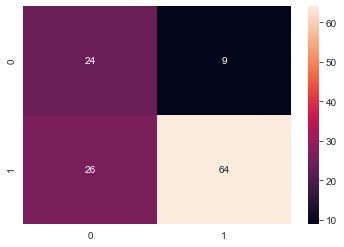

In [55]:
sns.heatmap(cm, annot=True)

### Algorithm 2: Naive Bayes¶

In [56]:
from sklearn.naive_bayes import GaussianNB
NBClassifier =GaussianNB()
NBClassifier.fit(x_train, y_train)

GaussianNB()

In [57]:
y_pred = NBClassifier.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [58]:
print("Accuracy score using Naive Bayes = ", metrics.accuracy_score(y_pred, y_test))

Accuracy score using Naive Bayes =  0.8292682926829268


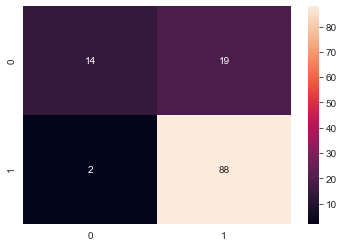

In [59]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

- Higher Accuracy is given by NaiveBayesClassifier model that is 83% with 21 wrong predictions out of 123.

### Predicting Loan Status for test dataset using Naive Bayes Algorithm

In [60]:
testdata = pd.read_csv("Loan Eligible Dataset\loan-test.csv")

In [61]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


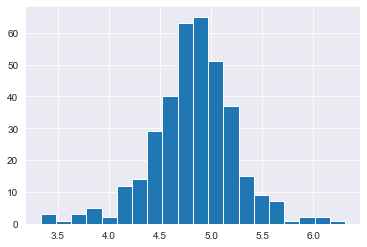

In [62]:
testdata['LoanAmount_log'] = np.log(testdata['LoanAmount'])
testdata['LoanAmount_log'].hist(bins=20)

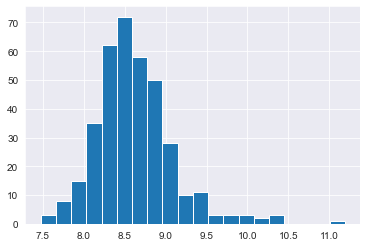

In [63]:
testdata['TotalIncome'] = testdata['ApplicantIncome'] + testdata['CoapplicantIncome']
testdata['TotalIncome_log'] = np.log(testdata['TotalIncome'])
testdata['TotalIncome_log'].hist(bins=20)

In [64]:
testdata.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480,5720,8.651724
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,4576,8.428581
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,6800,8.824678
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,4.605170,4886,8.494129
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709,3276,8.094378
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban,5.023881,5587,8.628198
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban,4.077537,2226,7.707962
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural,4.990433,3881,8.263848
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban,5.634790,13633,9.520249
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban,4.812184,4800,8.476371


### Handling missing values

In [65]:

testdata['Gender'].fillna(testdata['Gender'].mode()[0], inplace=True)
testdata['Married'].fillna(testdata['Married'].mode()[0], inplace=True)
testdata['Dependents'].fillna(testdata['Dependents'].mode()[0], inplace=True)
testdata['Self_Employed'].fillna(testdata['Self_Employed'].mode()[0], inplace=True)
testdata['Loan_Amount_Term'].fillna(testdata['Loan_Amount_Term'].mode()[0], inplace=True)
testdata['Credit_History'].fillna(testdata['Credit_History'].mode()[0], inplace=True)

In [66]:
testdata.LoanAmount = testdata.LoanAmount.fillna(testdata.LoanAmount.mean())
testdata.LoanAmount_log = testdata.LoanAmount_log.fillna(testdata.LoanAmount_log.mean())

In [67]:
testdata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [68]:
#Label encoding categorical values for test data.
cat_cols=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
le=LabelEncoder()
for i in cat_cols:
    testdata[i]=le.fit_transform(testdata[i])
testdata.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
LoanAmount_log       float64
TotalIncome            int64
TotalIncome_log      float64
dtype: object

In [69]:
# Feature Selection and Scaling data set
test = testdata[train_features].values
test = scale.fit_transform(test)

In [70]:
# Applying naive bayes algorithm
pred = NBClassifier.predict(test)

In [71]:
pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

The above are the predicted values for test dataset

In [72]:
testdata['Predicted_LoanStatus'] = pred
testdata['Eligibility'] = testdata['Predicted_LoanStatus'].map({1: "Eligible",  0:"Not Eligible"})

In [78]:
output = testdata[["Loan_ID","TotalIncome","LoanAmount","Credit_History","Predicted_LoanStatus","Eligibility"]]
output.head(30)

,Loan_ID,TotalIncome,LoanAmount,Credit_History,Predicted_LoanStatus,Eligibility
0,LP001015,5720,110.0,1.0,1,Eligible
1,LP001022,4576,126.0,1.0,1,Eligible
2,LP001031,6800,208.0,1.0,1,Eligible
3,LP001035,4886,100.0,1.0,1,Eligible
4,LP001051,3276,78.0,1.0,1,Eligible
5,LP001054,5587,152.0,1.0,1,Eligible
6,LP001055,2226,59.0,1.0,1,Eligible
7,LP001056,3881,147.0,0.0,0,Not Eligible
8,LP001059,13633,280.0,1.0,1,Eligible
9,LP001067,4800,123.0,1.0,1,Eligible


In [74]:
#to export the output dataframe into a csv file
output.to_csv("Loan Eligible Dataset\output.csv")